## F1 

### Importing

In [107]:
#Importing Data 
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "pranay13257/f1-dnf-classification",
    "f1_dnf.csv" 
)

In [108]:
# First look at data
df.head()
df.info()
# target_finish == 1 means the driver finished the race and 0 means DNF 
df.target_finish.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9029 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     8982 non-null   object 
 9   fastestLap       10000 non-null  object 
 10  rank             10000 non-null  object 
 11  fastestLapTime   10000 non-null  object 
 12  fastestLapSpeed  9047 non-null   object 
 13  driverRef        10000 non-null  object 
 14  surname          10000 non-null  object 
 15  forename         10000 non-null  object 
 16  dob              10000 non-null  object 
 17  nationality_x

target_finish
0    7105
1    2895
Name: count, dtype: int64

In [109]:
df[['fastestLap','fastestLapSpeed','fastestLapTime']].sample(5)

,fastestLap,fastestLapSpeed,fastestLapTime
6963,27,186.717,1:22.983
913,62,226.067,1:18.173
1235,44,215.382,1:37.646
6903,70,212.612,1:12.961
1530,\N,\N,\N


In [110]:
# Before converting, see what string values are hiding in object columns
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    unique_vals = df[col].unique()
    print(f"\n{col}: {len(unique_vals)} unique values")
    print(f"Sample values: {unique_vals[:10]}")
    
    # Check for suspicious strings
    suspicious = df[df[col].isin(['\\N', 'NaN', 'nan', 'NULL', 'null', '', ' '])][col].value_counts()
    if len(suspicious) > 0:
        print(f"Found suspicious values in {col}:")
        print(suspicious)


milliseconds: 2600 unique values
Sample values: [nan '\\N' '4754232' '5513145' '6523887' '5300227' '6243700' '6918000'
 '9989700' '5251638']
Found suspicious values in milliseconds:
milliseconds
\N    6375
Name: count, dtype: int64

fastestLap: 80 unique values
Sample values: ['\\N' '57' '61' '53' '64' '55' '54' '63' '46' '29']
Found suspicious values in fastestLap:
fastestLap
\N    6895
Name: count, dtype: int64

rank: 26 unique values
Sample values: ['\\N' '16' '17' '9' '3' '7' '2' '13' '1' '11']
Found suspicious values in rank:
rank
\N    6798
Name: count, dtype: int64

fastestLapTime: 2990 unique values
Sample values: ['\\N' '1:10.005' '1:16.992' '1:27.092' '1:17.472' '1:40.315' '1:17.776'
 '1:19.491' '1:21.370' '1:12.268']
Found suspicious values in fastestLapTime:
fastestLapTime
\N    6895
Name: count, dtype: int64

fastestLapSpeed: 2743 unique values
Sample values: ['\\N' '222.052' '156.031' '239.457' '202.648' nan '197.844' '215.557'
 '190.419' '214.651']
Found suspicious valu

## Cleaning 

In [111]:
# They are objects so we first need to convert them to numeric
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df['laps'] = pd.to_numeric(df['laps'], errors='coerce')
df['milliseconds'] = pd.to_numeric(df['milliseconds'], errors='coerce')
df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'], errors='coerce')
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df['fastestLap'] = pd.to_numeric(df['fastestLap'], errors='coerce')
df['fastestLapTime'] = pd.to_numeric(df['fastestLapTime'], errors='coerce')
df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'], errors='coerce')

In [112]:
# Data was too dirty and had too many NaNs when converted from object to numeric
# Drops columns with too many NaNs
df = df.drop(columns=['milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   resultId        10000 non-null  int64  
 1   raceId          10000 non-null  int64  
 2   year            10000 non-null  int64  
 3   round           10000 non-null  int64  
 4   grid            10000 non-null  int64  
 5   positionOrder   10000 non-null  int64  
 6   points          9029 non-null   float64
 7   laps            9022 non-null   float64
 8   driverRef       10000 non-null  object 
 9   surname         10000 non-null  object 
 10  forename        10000 non-null  object 
 11  dob             10000 non-null  object 
 12  nationality_x   10000 non-null  object 
 13  constructorRef  10000 non-null  object 
 14  name            10000 non-null  object 
 15  nationality_y   10000 non-null  object 
 16  circuitRef      10000 non-null  object 
 17  circuitId       10000 non-null  

In [113]:
# Checking NaNs
print(df.isna().sum())
print(df.points.unique(),"\n",df.laps.unique(),"\n")

resultId            0
raceId              0
year                0
round               0
grid                0
positionOrder       0
points            971
laps              978
driverRef           0
surname             0
forename            0
dob                 0
nationality_x       0
constructorRef      0
name                0
nationality_y       0
circuitRef          0
circuitId           0
name_y              0
location            0
country             0
lat                 0
lng                 0
alt                 0
date                0
target_finish       0
dtype: int64
[ 3.    0.     nan 25.    1.    4.   10.    9.   12.    5.    6.    2.
  8.   11.   18.   26.   15.   30.    8.5  13.   19.    1.5   7.    6.5
  0.5   3.5   8.14 16.    4.5  36.  ] 
 [ 77.  16.   0.  69.   9.  53.  70.  79.  81.  51.  75.  55.  nan  66.
  67.  26.  27.  32.  44.  38.  78.  58.   8.  68.  13. 100.  34.  56.
  71.   7.  64.  30.  61.  62.  52.  65.  14.  57.   1.  76.  60.  31.
  54.  12.  41.  35

In [114]:
# Understand categorical columns
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].nunique())
    print("\n")

Column: resultId
10000


Column: raceId
1125


Column: year
75


Column: round
24


Column: grid
35


Column: positionOrder
39


Column: points
29


Column: laps
138


Column: driverRef
677


Column: surname
639


Column: forename
407


Column: dob
668


Column: nationality_x
40


Column: constructorRef
174


Column: name
77


Column: nationality_y
21


Column: circuitRef
77


Column: circuitId
77


Column: name_y
174


Column: location
75


Column: country
35


Column: lat
77


Column: lng
77


Column: alt
66


Column: date
1125


Column: target_finish
2




In [115]:
#Cleaning Data
# Filling NaNs in 'points' 
# Use race-specific median for all rows
df['points'] = df.groupby('raceId')['points'].transform(lambda x: x.fillna(x.median()))
# Fill any remaining NaNs with overall median
df['points'].fillna(df['points'].median(), inplace=True)

print(df['points'].isna().sum())

0


C:\Users\vatsa\AppData\Local\Temp\ipykernel_4164\3829971349.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['points'].fillna(df['points'].median(), inplace=True)


In [117]:
# Filling NaNs in 'laps'
df['laps'] = df.groupby('raceId')['laps'].transform(lambda x: x.fillna(x.median()))
df['laps'].fillna(df['laps'].median(), inplace=True)

print(df['laps'].isna().sum())

0


C:\Users\vatsa\AppData\Local\Temp\ipykernel_4164\462212142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['laps'].fillna(df['laps'].median(), inplace=True)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   resultId        10000 non-null  int64  
 1   raceId          10000 non-null  int64  
 2   year            10000 non-null  int64  
 3   round           10000 non-null  int64  
 4   grid            10000 non-null  int64  
 5   positionOrder   10000 non-null  int64  
 6   points          10000 non-null  float64
 7   laps            10000 non-null  float64
 8   driverRef       10000 non-null  object 
 9   surname         10000 non-null  object 
 10  forename        10000 non-null  object 
 11  dob             10000 non-null  object 
 12  nationality_x   10000 non-null  object 
 13  constructorRef  10000 non-null  object 
 14  name            10000 non-null  object 
 15  nationality_y   10000 non-null  object 
 16  circuitRef      10000 non-null  object 
 17  circuitId       10000 non-null  

In [119]:
# Data is now clean
df.sample(5)

,resultId,raceId,year,round,grid,positionOrder,points,laps,driverRef,surname,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
3647,17700,732,1962,4,10,3,4.0,52.0,ginther,Ginther,...,essarts,53,BRM,Rouen,France,49.3306,1.004580,81,1962-07-08,0
896,17145,706,1965,8,10,17,0.0,43.0,siffert,Siffert,...,monza,14,Brabham-BRM,Monza,Italy,45.6156,9.281110,162,1965-09-12,0
5327,20947,848,2011,8,3,4,12.0,57.0,hamilton,Hamilton,...,valencia,12,McLaren,Valencia,Spain,39.4589,-0.331667,4,2011-06-26,1
9574,17887,740,1961,3,1,1,9.0,16.0,phil_hill,Hill,...,spa,13,Ferrari,Spa,Belgium,50.4372,5.971390,401,1961-06-18,1
9939,25021,1054,2021,3,11,16,0.0,65.0,russell,Russell,...,portimao,75,Williams,Portimão,Portugal,37.2270,-8.626700,108,2021-05-02,0


### Visualize 

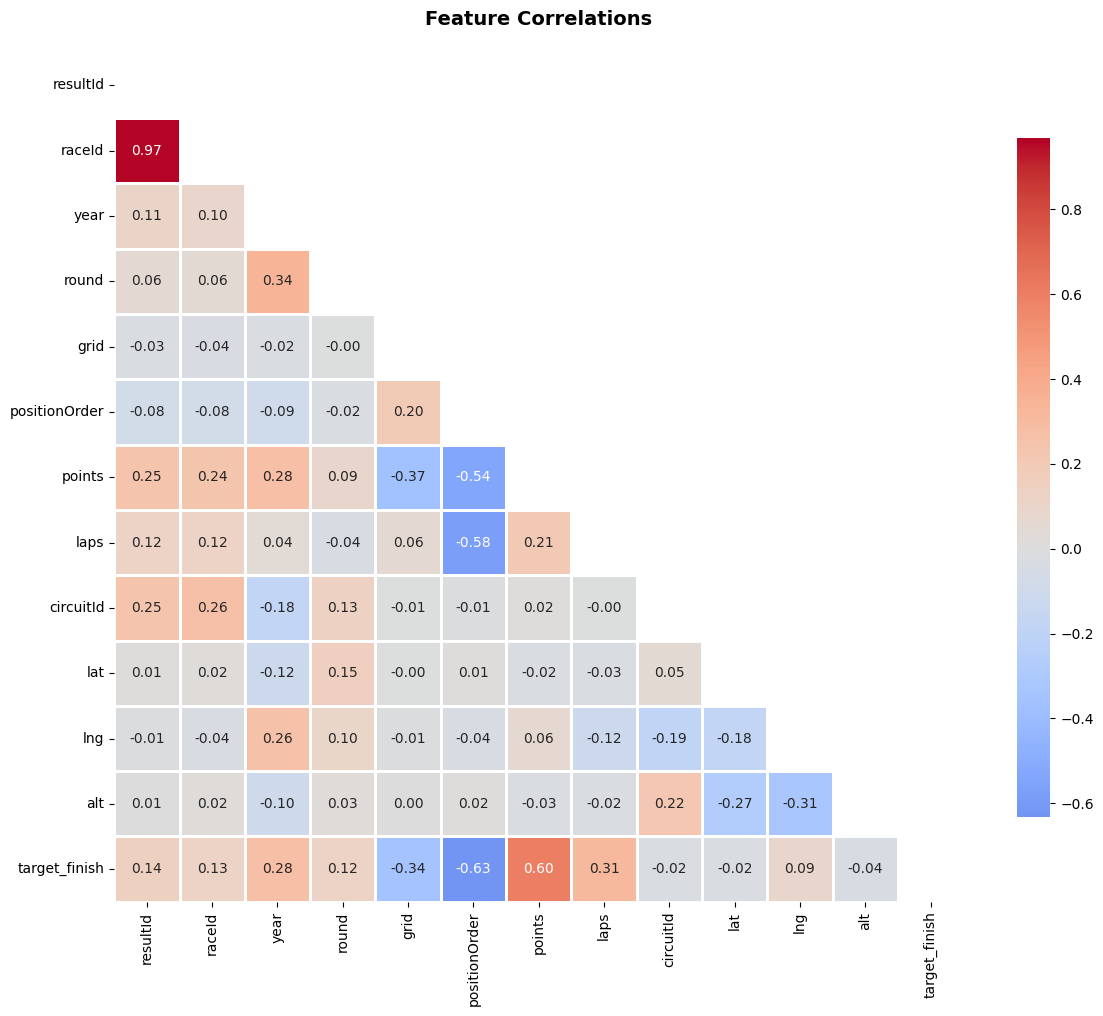

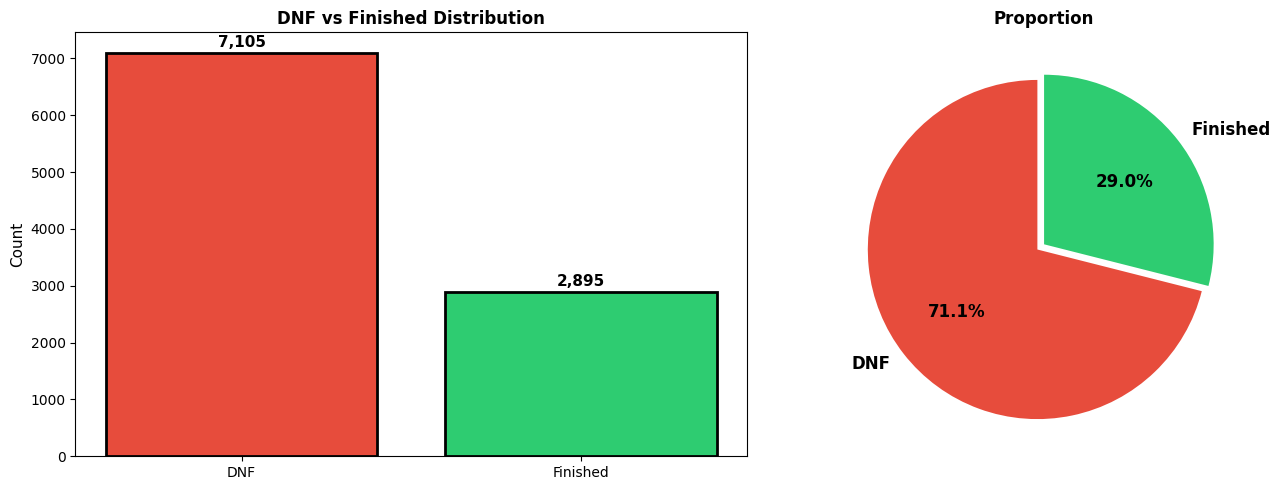

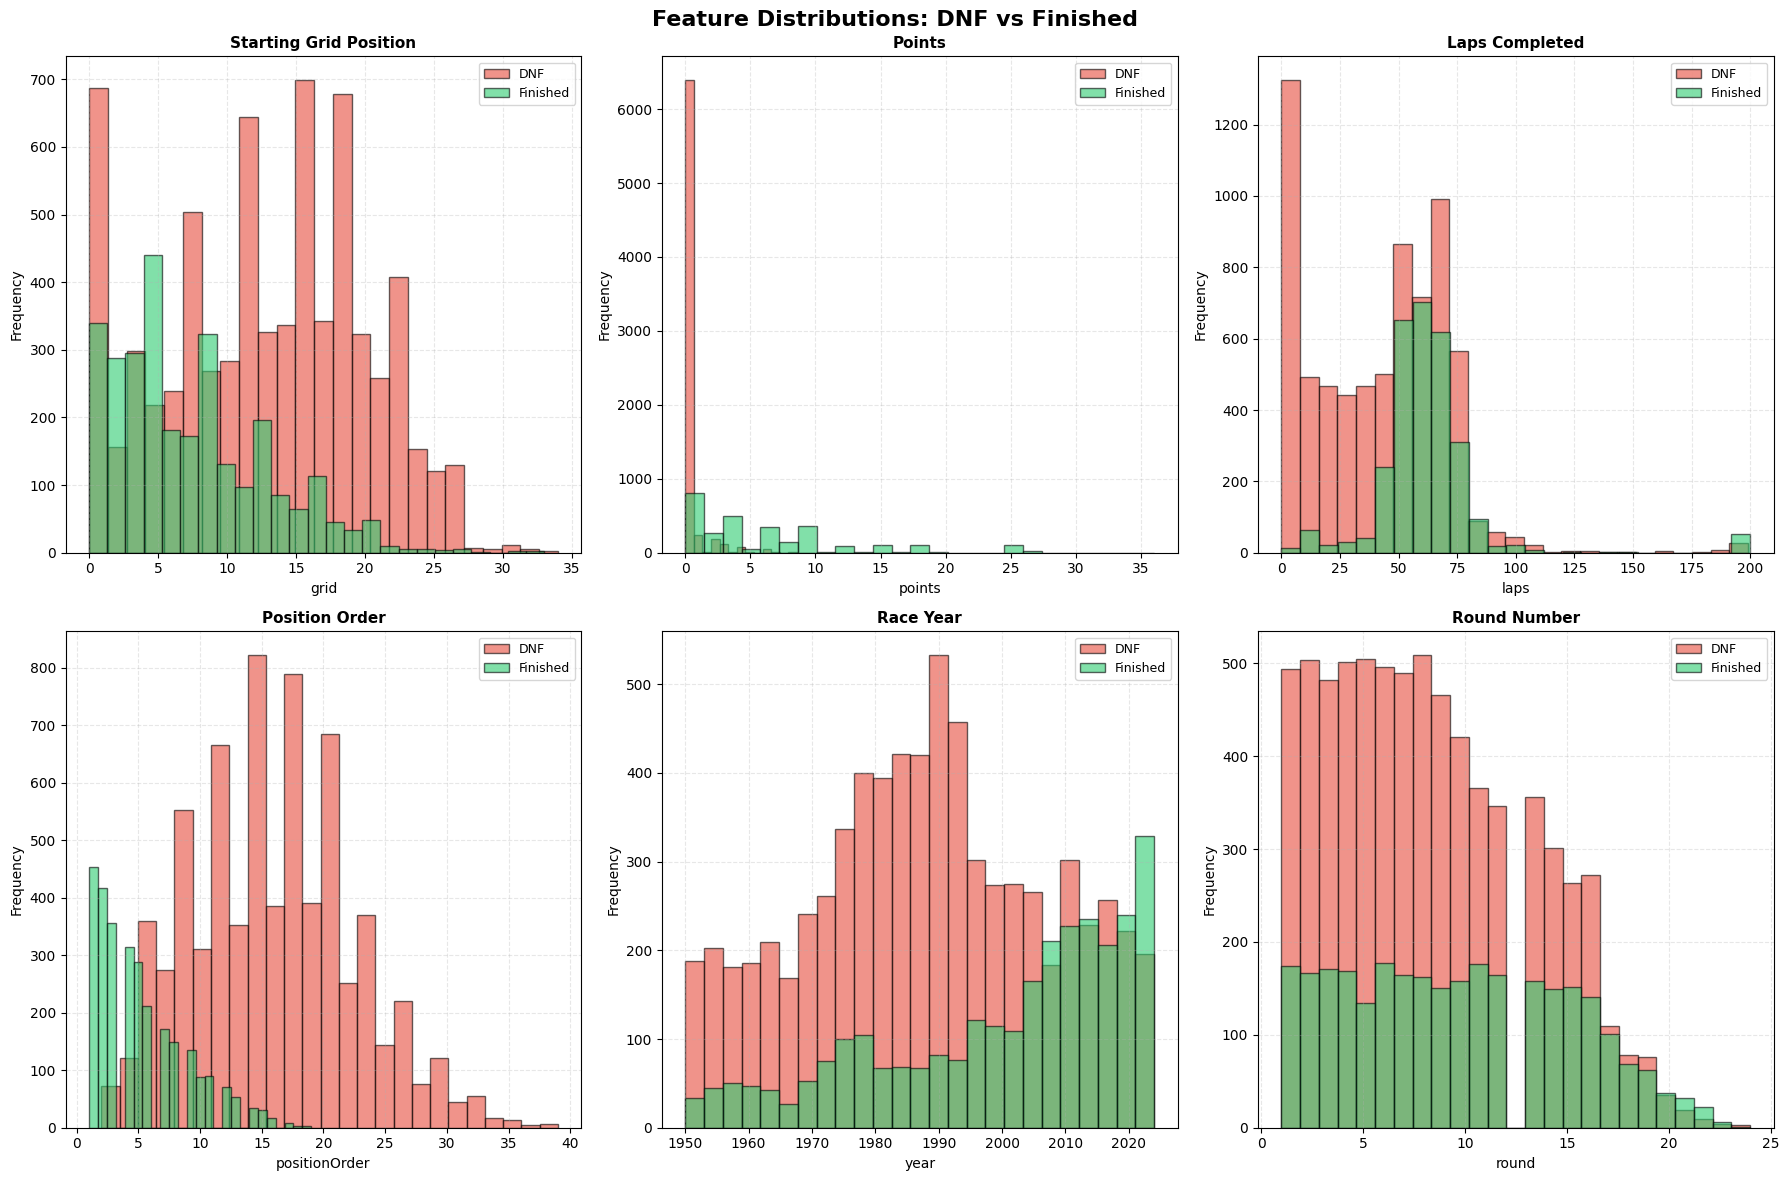

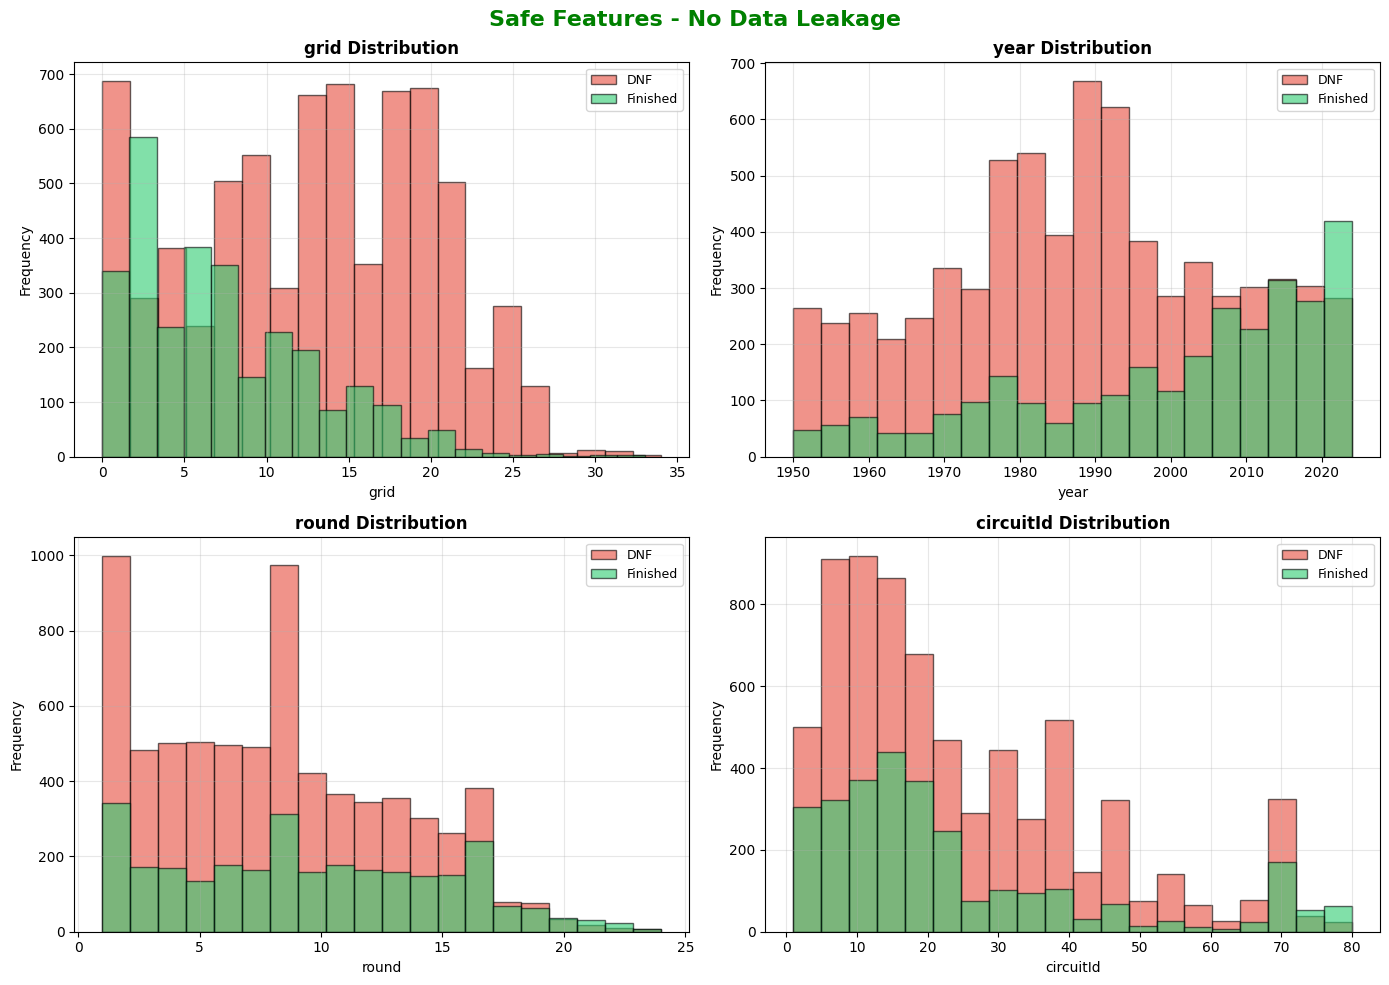

In [120]:
# Visualize 

# Correlation heatmap - only show lower triangle to avoid redundancy
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, mask=mask, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlations', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Check class balance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

counts = df['target_finish'].value_counts()
colors = ['#e74c3c', '#2ecc71']

ax1.bar(['DNF', 'Finished'], counts.values, color=colors, edgecolor='black', linewidth=2)
ax1.set_title('DNF vs Finished Distribution', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=11)

for i, count in enumerate(counts.values):
    ax1.text(i, count + 100, f'{count:,}', ha='center', fontsize=11, fontweight='bold')

ax2.pie(counts.values, labels=['DNF', 'Finished'], autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'},
        explode=(0.05, 0))
ax2.set_title('Proportion', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Compare feature distributions between DNF and Finished
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Feature Distributions: DNF vs Finished', fontsize=16, fontweight='bold')

features_to_plot = [
    ('grid', 'Starting Grid Position'),
    ('points', 'Points'),
    ('laps', 'Laps Completed'),
    ('positionOrder', 'Position Order'),
    ('year', 'Race Year'),
    ('round', 'Round Number')
]

for idx, (feature, title) in enumerate(features_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    ax.hist(df[df['target_finish']==0][feature].dropna(), bins=25, alpha=0.6, 
            label='DNF', color='#e74c3c', edgecolor='black')
    ax.hist(df[df['target_finish']==1][feature].dropna(), bins=25, alpha=0.6, 
            label='Finished', color='#2ecc71', edgecolor='black')
    
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Focus on safe features for modeling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Safe Features - No Data Leakage', fontsize=16, fontweight='bold', color='green')

safe_features = ['grid', 'year', 'round', 'circuitId']

for idx, feature in enumerate(safe_features):
    ax = axes[idx // 2, idx % 2]
    
    ax.hist(df[df['target_finish']==0][feature].dropna(), bins=20, alpha=0.6, 
            label='DNF', color='#e74c3c', edgecolor='black')
    ax.hist(df[df['target_finish']==1][feature].dropna(), bins=20, alpha=0.6, 
            label='Finished', color='#2ecc71', edgecolor='black')
    
    ax.set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Training Random Forest

In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import KFold

In [ ]:
# Target Encoding - Encode based on DNF rate per category
def target_encode(df, column, target, n_splits=5):
    """Safe target encoding using KFold to prevent leakage"""
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    encoded_col = np.zeros(len(df))
    
    for train_idx, val_idx in kf.split(df):
        # Calculate mean target for each category on train set
        means = df.iloc[train_idx].groupby(column)[target].mean()
        # Apply to validation set
        encoded_col[val_idx] = df.iloc[val_idx][column].map(means)
    
    # Fill any remaining NaN with overall mean
    encoded_col = pd.Series(encoded_col).fillna(df[target].mean())
    return encoded_col

# Apply target encoding
df['driverRef_encoded'] = target_encode(df, 'driverRef', 'target_finish')
df['constructorRef_encoded'] = target_encode(df, 'constructorRef', 'target_finish')
df['circuitId_encoded'] = target_encode(df, 'circuitId', 'target_finish')
df['raceId_encoded'] = target_encode(df, 'raceId', 'target_finish')

In [132]:
# Final features
features = ['grid', 'driverRef_encoded', 'constructorRef_encoded', 'circuitId_encoded', 'raceId_encoded']

X = df[features]
y = df['target_finish']

In [124]:
# Verify no data leakage - check correlations
print("Correlation with target_finish:")
print(X.corrwith(y).sort_values(ascending=False))
print("\nFeature summary:")
print(X.describe())

Correlation with target_finish:
driverRef_encoded         0.469429
constructorRef_encoded    0.469341
raceId_encoded            0.263144
circuitId_encoded         0.236176
grid                     -0.344964
dtype: float64

Feature summary:
               grid  driverRef_encoded  constructorRef_encoded  \
count  10000.000000       10000.000000            10000.000000   
mean      11.176200           0.293750                0.290169   
std        7.241008           0.243278                0.223012   
min        0.000000           0.000000                0.000000   
25%        5.000000           0.066667                0.092715   
50%       11.000000           0.279412                0.231373   
75%       17.000000           0.469388                0.492843   
max       34.000000           1.000000                1.000000   

       circuitId_encoded  raceId_encoded  
count       10000.000000    10000.000000  
mean            0.289756        0.288929  
std             0.122251        0.24

In [125]:
df.sample(5)

,resultId,raceId,year,round,grid,positionOrder,points,laps,driverRef,surname,...,country,lat,lng,alt,date,target_finish,driverRef_encoded,constructorRef_encoded,circuitId_encoded,raceId_encoded
2377,18053,745,1961,8,6,7,0.0,96.0,clark,Clark,...,USA,42.3369,-76.92720,485,1961-10-08,0,0.500000,0.151515,0.137681,0.166667
6381,9415,404,1986,1,14,8,0.0,58.0,angelis,de Angelis,...,Brazil,-22.9756,-43.39500,1126,1986-03-23,0,0.242424,0.163551,0.156627,0.222222
9197,14570,591,1974,2,9,21,0.0,20.0,merzario,Merzario,...,Brazil,-23.7036,-46.69970,785,1974-01-27,0,0.055556,0.111111,0.317690,0.142857
129,8829,382,1988,11,0,27,0.0,0.0,sala,Pérez-Sala,...,Belgium,50.4372,5.97139,401,1988-08-28,0,0.000000,0.005155,0.386243,0.250000
4561,3814,198,1998,8,3,6,3.5,70.0,coulthard,Coulthard,...,France,46.8642,3.16361,228,1998-06-28,0,0.476923,0.546248,0.268293,0.750000


In [ ]:
# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Class distribution in train: {y_train.value_counts(normalize=True)}")

Training set: (8000, 5)
Test set: (2000, 5)
Class distribution in train: target_finish
0    0.7105
1    0.2895
Name: proportion, dtype: float64


In [127]:
# Hyperparameter Tuning with GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=2,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best parameters
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation ROC AUC: {grid_search.best_score_:.4f}")

# Use best model
rf_model = grid_search.best_estimator_

Starting GridSearchCV...
Fitting 2 folds for each of 216 candidates, totalling 432 fits

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 200}
Best Cross-Validation ROC AUC: 0.8569


In [134]:
# Train with best parameters from GridSearch
# (rf_model is already fitted from GridSearchCV above)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print(f"\nTest Set Performance:")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")


Test Set Performance:
ROC AUC: 0.8654


Classification Report:
              precision    recall  f1-score   support

         DNF       0.85      0.90      0.87      1421
    Finished       0.71      0.59      0.65       579

    accuracy                           0.81      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.81      0.81      0.81      2000



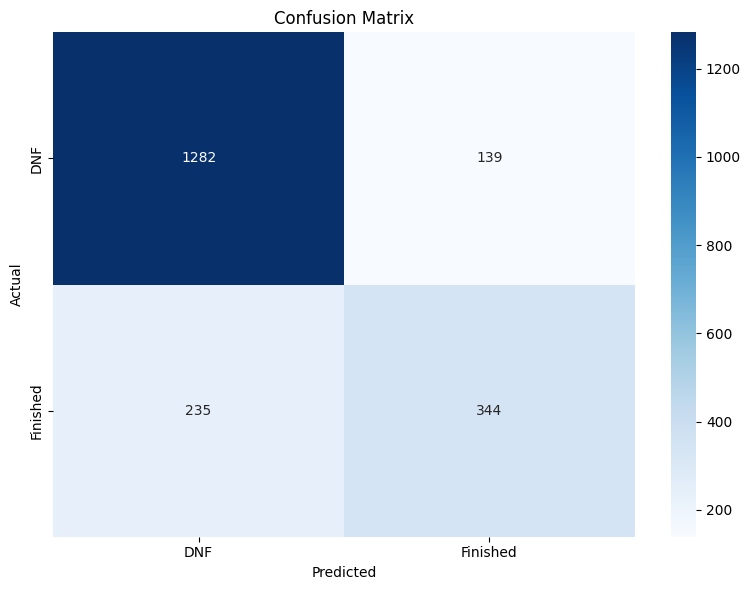


ROC AUC Score: 0.8654


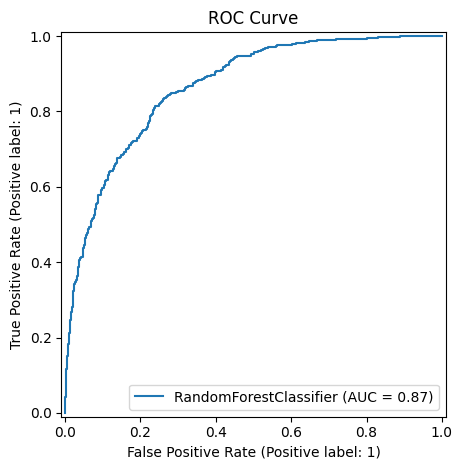

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['DNF', 'Finished']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['DNF', 'Finished'], 
            yticklabels=['DNF', 'Finished'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('ROC Curve')
plt.tight_layout()
plt.show()

C:\Users\vatsa\AppData\Local\Temp\ipykernel_4164\674785263.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')


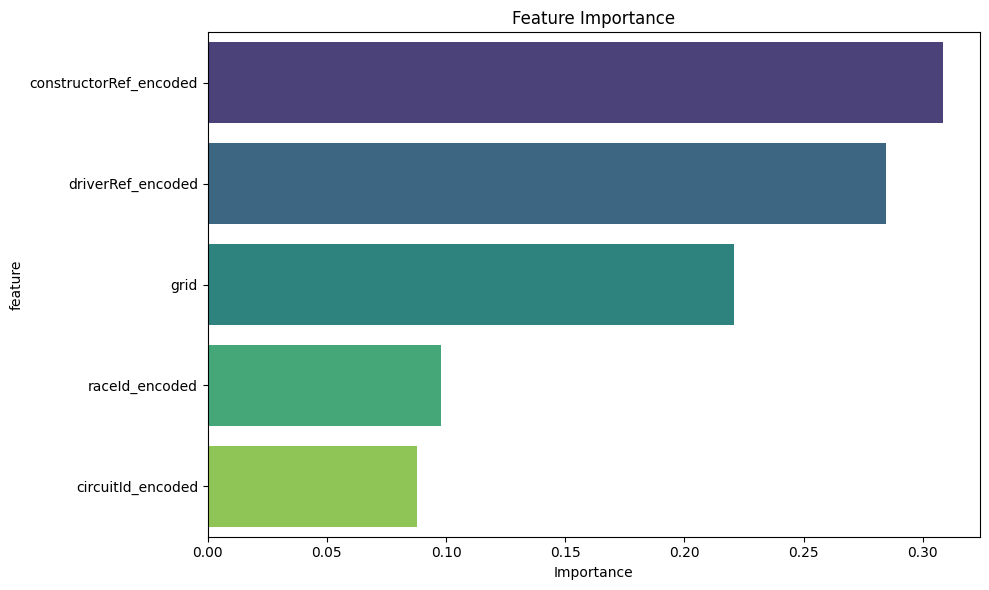


Feature Importance:
                  feature  importance
2  constructorRef_encoded    0.308620
1       driverRef_encoded    0.284630
0                    grid    0.221012
4          raceId_encoded    0.097858
3       circuitId_encoded    0.087880


In [130]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
print(feature_importance)